# Linear Regression 

### custom code for linear regression

In [153]:
class MLR:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m=num/den
        self.b=y_train.mean()-X_train.mean()*self.m
        print(f"The intercept for this data is {self.b} and slope is {self.m}")
        return self.m,self.b
    def predict(self,x_test):
        y_pred=self.m*x_test-self.b
        return y_pred
    def MSE(self, y_pred, y_test):
      score = 0
      for i in range(y_test.shape[0]):
        score += (y_pred[i] - y_test[i]) ** 2
      print(f"SCORE is {score}")
      return score / y_test.shape[0]

        

In [155]:
import pandas as pd
import numpy as np 
df=pd.read_csv(r"C:\Users\USER\Downloads\placement.csv")
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [157]:
df.shape

(200, 2)

In [160]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
X_train

array([5.94, 6.05, 5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19,
       8.6 , 6.07, 7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99,
       8.01, 7.14, 6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38,
       6.93, 8.99, 7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28,
       6.79, 6.12, 6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85,
       6.19, 7.3 , 6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33,
       9.06, 6.1 , 5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61,
       7.34, 9.38, 7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18,
       6.66, 8.44, 7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84,
       5.84, 9.58, 8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51,
       7.28, 6.92, 6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13,
       5.9 , 9.04, 6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.09, 5.53,
       6.75, 7.62, 6.97, 7.66, 6.14, 7.78, 7.25, 8.65])

In [164]:
lr=MLR()
m,b=lr.fit(X_train,y_train)

The intercept for this data is -0.8781178361812056 and slope is 0.5557424096560765


In [166]:
y_pred=lr.predict(X_test)

In [168]:
lr_mse=lr.MSE(y_pred,y_test)
lr_mse

SCORE is 199.72860835760784


3.328810139293464

### Through Sklearn library

In [185]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))

LinearRegression()

In [195]:
slr.predict(X_test.reshape(-1,1))

array([[3.89015204],
       [3.09544039],
       [2.38964753],
       [2.57859995],
       [1.66162498],
       [1.78388831],
       [2.07843178],
       [2.93427509],
       [3.76233128],
       [2.93983252],
       [4.09021931],
       [3.5122472 ],
       [2.97317706],
       [2.4063198 ],
       [3.1899166 ],
       [3.46778781],
       [1.95061103],
       [3.24549084],
       [2.97873449],
       [3.41777099],
       [2.56192768],
       [3.16768691],
       [2.86202858],
       [3.12322751],
       [3.68452735],
       [2.87314343],
       [3.49557493],
       [3.34552448],
       [3.91793916],
       [1.9672833 ],
       [3.6511828 ],
       [3.2121463 ],
       [3.74010159],
       [2.78978207],
       [2.78422464],
       [3.27327796],
       [3.52891947],
       [2.61750192],
       [2.66196131],
       [2.71753555],
       [3.08988297],
       [4.08466188],
       [2.13400602],
       [1.95616845],
       [3.44000069],
       [2.87870085],
       [2.95094737],
       [2.834

In [197]:
m = slr.coef_
b=slr.intercept_

In [203]:
print(m)
print(b)

[[0.55574241]]
[-0.87811784]


### Best fit line through sklean lib

Text(0, 0.5, 'Package(in lpa)')

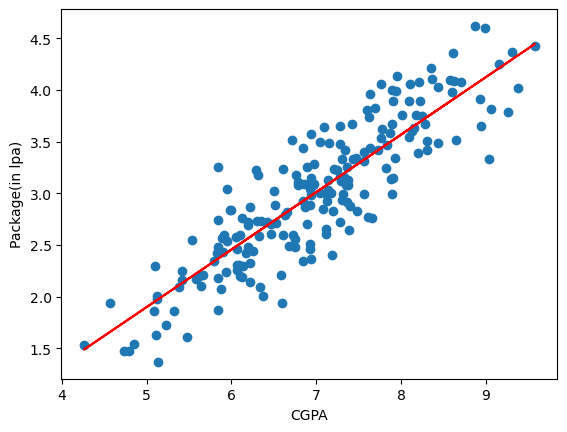

In [211]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,slr.predict(X_train.reshape(-1, 1)),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

### Best fit line through our custom code

Text(0, 0.5, 'Package(in lpa)')

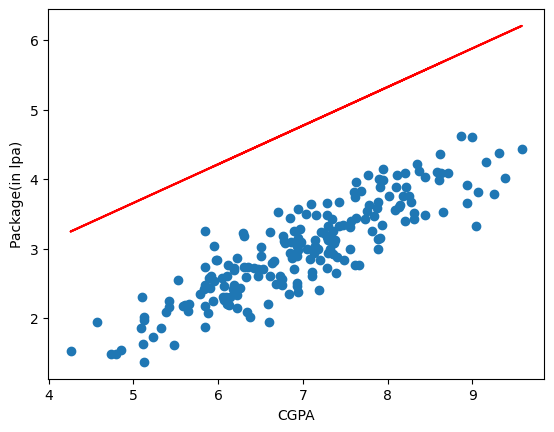

In [215]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')